In [41]:
import pandas as pd
import numpy as np
dt = pd.read_csv('iris_data_label.csv')
dt.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [42]:
x = dt.drop(['label'],axis=1)
y = dt.loc[:,'label']

from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x,y)
y_predict = KNN.predict(x)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

1.0


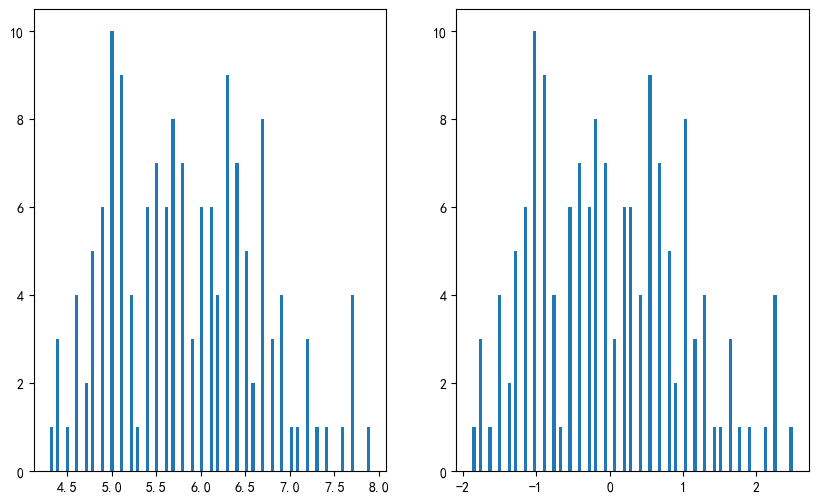

In [47]:
from sklearn.preprocessing import StandardScaler
x_norm = StandardScaler().fit_transform(x)
x1_mean = x.iloc[:,0].mean()
x1_norm_mean = x_norm[:,0].mean()
x1_sigma = x.iloc[:,0].std()
x1_norm_sigma = x_norm[:,0].std()

%matplotlib inline
from matplotlib import pyplot as plt

fig1 = plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(x.iloc[:,0],bins=100)
plt.subplot(122)
plt.hist(x_norm[:,0],bins=100)
plt.show()

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x_pca = pca.fit_transform(x_norm)

var_ratio = pca.explained_variance_ratio_
print(var_ratio)

[0.72962445 0.22850762 0.03668922 0.00517871]


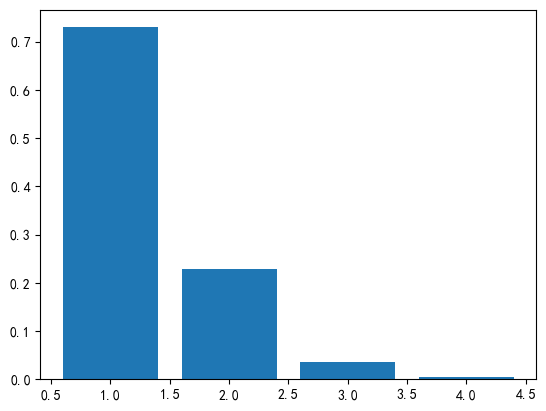

In [51]:
fig2 = plt.figure()
plt.bar([1,2,3,4],var_ratio)
plt.show()

In [52]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_norm)
x_pca.shape

(150, 2)

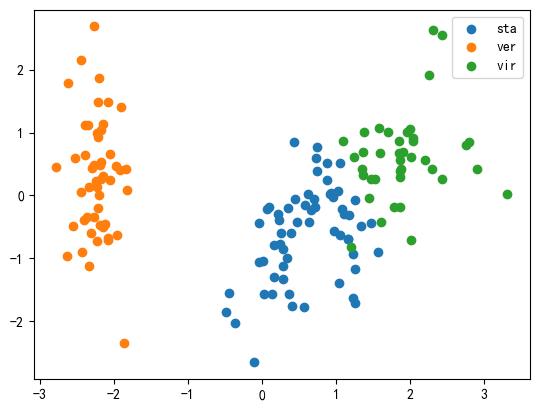

In [55]:
fig3 = plt.figure
sta = plt.scatter(x_pca[:,0][y==0],x_pca[:,1][y==0])
ver = plt.scatter(x_pca[:,0][y==1],x_pca[:,1][y==1])
vir = plt.scatter(x_pca[:,0][y==2],x_pca[:,1][y==2])
plt.legend((sta,ver,vir),('sta','ver','vir'))
plt.show()

In [56]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_pca,y)
y_predict = KNN.predict(x_pca)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.9866666666666667
